In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

In [3]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
print(data['Weapon_Used_Code'].value_counts())

Weapon_Used_Code
400.0    3990
500.0     789
511.0     546
102.0     388
200.0     160
109.0     154
106.0     131
207.0     125
307.0      84
512.0      80
306.0      63
212.0      55
312.0      52
304.0      51
308.0      49
205.0      45
201.0      43
114.0      41
204.0      37
302.0      37
113.0      35
101.0      34
301.0      26
310.0      26
215.0      25
223.0      24
311.0      23
219.0      23
506.0      22
107.0      18
515.0      18
218.0      17
305.0      16
221.0      14
216.0      13
103.0      12
309.0      11
112.0       8
104.0       7
514.0       7
211.0       6
513.0       4
303.0       4
510.0       3
206.0       3
508.0       2
504.0       2
105.0       2
214.0       2
503.0       1
501.0       1
202.0       1
111.0       1
210.0       1
122.0       1
115.0       1
213.0       1
Name: count, dtype: int64


In [5]:
data['Weapon_Description'].value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
UNKNOWN WEAPON/OTHER WEAPON                        789
VERBAL THREAT                                      546
HAND GUN                                           388
KNIFE WITH BLADE 6INCHES OR LESS                   160
SEMI-AUTOMATIC PISTOL                              154
UNKNOWN FIREARM                                    131
OTHER KNIFE                                        125
VEHICLE                                             84
MACE/PEPPER SPRAY                                   80
ROCK/THROWN OBJECT                                  63
BOTTLE                                              55
PIPE/METAL PIPE                                     52
CLUB/BAT                                            51
STICK                                               49
KITCHEN KNIFE                                       45
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            43
AIR PISTOL/REVOLVER/RIFLE/BB GUN              

In [6]:
data[['Weapon_Used_Code', 'Weapon_Description']].value_counts()

Weapon_Used_Code  Weapon_Description                            
400.0             STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
500.0             UNKNOWN WEAPON/OTHER WEAPON                        789
511.0             VERBAL THREAT                                      546
102.0             HAND GUN                                           388
200.0             KNIFE WITH BLADE 6INCHES OR LESS                   160
109.0             SEMI-AUTOMATIC PISTOL                              154
106.0             UNKNOWN FIREARM                                    131
207.0             OTHER KNIFE                                        125
307.0             VEHICLE                                             84
512.0             MACE/PEPPER SPRAY                                   80
306.0             ROCK/THROWN OBJECT                                  63
212.0             BOTTLE                                              55
312.0             PIPE/METAL PIPE                          

In [7]:
data[['Status_Description', 'Status']].value_counts()

Status_Description  Status
Invest Cont         IC        15236
Adult Other         AO         2597
Adult Arrest        AA         2054
Juv Arrest          JA           70
Juv Other           JO           43
Name: count, dtype: int64

In [8]:
data['Status'].value_counts()

Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64

In [9]:
data['Status_Description'].value_counts()

Status_Description
Invest Cont     15236
Adult Other      2597
Adult Arrest     2054
Juv Arrest         70
Juv Other          43
Name: count, dtype: int64

In [10]:
data[['Premise_Description', 'Premise_Code']].value_counts()

Premise_Description                           Premise_Code
STREET                                        101.0           5033
SINGLE FAMILY DWELLING                        501.0           3379
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  502.0           2491
PARKING LOT                                   108.0           1437
SIDEWALK                                      102.0            978
                                                              ... 
FRAT HOUSE/SORORITY/DORMITORY                 508.0              1
FACTORY                                       302.0              1
SKATEBOARD FACILITY/SKATEBOARD PARK*          736.0              1
MTA - PURPLE LINE - PERSHING SQUARE           917.0              1
RECORD-CD MUSIC/COMPUTER GAME STORE           225.0              1
Name: count, Length: 216, dtype: int64

In [11]:
data['Premise_Code'].value_counts()

Premise_Code
101.0    5033
501.0    3379
502.0    2491
108.0    1437
102.0     978
         ... 
214.0       1
909.0       1
896.0       1
744.0       1
250.0       1
Name: count, Length: 217, dtype: int64

In [12]:
data['Premise_Description'].value_counts()

Premise_Description
STREET                                          5033
SINGLE FAMILY DWELLING                          3379
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    2491
PARKING LOT                                     1437
SIDEWALK                                         978
                                                ... 
BUS DEPOT/TERMINAL, OTHER THAN MTA                 1
MTA - RED LINE - HOLLYWOOD/WESTERN                 1
MTA - SILVER LINE - ROSECRANS                      1
HIGH-RISE BUILDING                                 1
COMPUTER SERVICES/REPAIRS/SALES                    1
Name: count, Length: 216, dtype: int64

In [13]:
data[['Area_Name', 'Area_ID']].value_counts()

Area_Name    Area_ID
77th Street  12.0       1345
Pacific      14.0       1157
Central      1.0        1156
Southwest    3.0        1130
Southeast    18.0       1067
N Hollywood  15.0       1065
Hollywood    6.0        1014
Newton       13.0        999
Olympic      20.0        960
Wilshire     7.0         943
Rampart      2.0         931
West LA      8.0         910
Van Nuys     9.0         902
Harbor       5.0         872
Mission      19.0        870
Northeast    11.0        839
Topanga      21.0        792
West Valley  10.0        790
Devonshire   17.0        769
Hollenbeck   4.0         755
Foothill     16.0        734
Name: count, dtype: int64

In [14]:
data['Area_Name'].value_counts()

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64

In [15]:
data['Area_ID'].value_counts()

Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64

In [16]:
test_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [17]:
print(test_data[['Weapon_Used_Code', 'Weapon_Description']].value_counts())
print(test_data['Weapon_Description'].value_counts())
print(test_data['Weapon_Used_Code'].value_counts())

Weapon_Used_Code  Weapon_Description                            
400.0             STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    1003
500.0             UNKNOWN WEAPON/OTHER WEAPON                        208
511.0             VERBAL THREAT                                      110
102.0             HAND GUN                                            98
200.0             KNIFE WITH BLADE 6INCHES OR LESS                    50
106.0             UNKNOWN FIREARM                                     38
109.0             SEMI-AUTOMATIC PISTOL                               34
207.0             OTHER KNIFE                                         32
307.0             VEHICLE                                             28
212.0             BOTTLE                                              18
512.0             MACE/PEPPER SPRAY                                   17
308.0             STICK                                               16
306.0             ROCK/THROWN OBJECT                       

### Data Cleaning: Dropping Redundant Columns

In the initial dataset, I identified four columns that contained redundant information. These columns were:

1. **Weapon_Used_Code**
2. **Status_Description**
3. **Premise_Description**
4. **Area_Name**

Each of these columns had a corresponding column that provided the same information in a different format:

- `Weapon_Description` and `Weapon_Used_Code`
- `Status_Description` and `Status`
- `Premise_Description` and `Premise_Code`
- `Area_Name` and `Area_ID`

To streamline our dataset and ensure that I focus on the most relevant information for our analysis, I decided to drop the columns `Weapon_Description`, `Status_Description`, `Premise_Description`, and `Area_Name`. 

This decision was made based on the following reasons:
1. **Redundancy**: Each dropped column had a corresponding column that conveyed the same information. By maintaining only one version of the information, we ensure the integrity and clarity of our dataset.
3. **Efficiency**: Reducing the number of columns simplifies the dataset, making it easier to handle and analyze. This can improve the performance of data processing tasks and the interpretability of analysis results.

The resulting cleaned dataset retains the most relevant columns, which are:

- **Weapon_Used_Code**
- **Status**
- **Premise_Code**
- **Area_ID**

This cleaned dataset is now more concise and focused, setting a solid foundation for accurate and efficient analysis.

### Data Cleaning: Dropping Columns with Missing Values

I identified that the `Cross_Street` column had 16,000 null values. Due to the high proportion of missing data and its limited relevance to my analysis, I decided to drop this column to maintain the dataset's integrity and quality.

In [18]:
data['Cross_Street'].isnull().sum()

16552

In [19]:
data = data.drop('Weapon_Description', axis=1)
data = data.drop('Status_Description', axis=1)
data = data.drop('Premise_Description', axis=1)
data = data.drop('Area_Name', axis=1)
data = data.drop('Cross_Street', axis=1)

In [20]:
data['Victim_Age'].value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [21]:
data['Victim_Age'].unique()

array([75., 41., 67., 61.,  0., 50., 68., 22., 31., 46., 72., 26., 38.,
       37., 42., 40., 53., 60., 29., 13., 33., 27., 15., 23., 74., 63.,
       78., 51., 44., 34., 69., 36., 52., 25., 49., 48., 32., 18., 35.,
       24., 39., 16., 28., 47., 30., 64., 76.,  5., 58., 45., 57., 19.,
       55., 54., 21., 65., 17., 20., 77., 82., 56., -2., 84., 59., 43.,
        7., 70., 66., 62., 14., 80., 71., 81., 96., 12., 11.,  4., 83.,
       10.,  8.,  6., 88., 86., 73.,  9., 87., 85., 93., 95., 99., 79.,
        3.,  2., 91., 92., 90., 89., 98., -1., 94.])

### Data Cleaning: Handling Invalid Values in `Victim_Age`

I identified that the `Victim_Age` column contained invalid values such as -1 and -2. These values are not plausible for representing ages, so I replaced them with 0 to ensure data consistency and accuracy.

In [22]:
data['Victim_Age'].replace([-1, -2], 0, inplace=True)

In [23]:
data['Victim_Age'].value_counts()

Victim_Age
0.0     4834
30.0     448
31.0     446
26.0     442
29.0     425
        ... 
93.0       5
92.0       2
96.0       2
98.0       2
94.0       2
Name: count, Length: 98, dtype: int64

### Data Cleaning: Handling Missing Values in `Weapon_Used_Code`

I found that the `Weapon_Used_Code` column contained some missing values. To address this, I replaced the missing values with 0 to maintain data consistency and avoid potential issues during analysis.

In [24]:
data['Weapon_Used_Code'] = data[['Weapon_Used_Code']].fillna(0)

### Data Cleaning: Handling Missing Values in `Victim_Sex` and `Victim_Descent`

I identified missing values in the `Victim_Sex` and `Victim_Descent` columns. To address this, I replaced the missing values with 'Unknown' to maintain data integrity and ensure completeness for subsequent analysis.

In [25]:
data['Victim_Sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [26]:
data['Victim_Descent'].unique()

array(['W', 'H', 'B', 'X', nan, 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z',
       'V', 'P', 'D', 'U', 'G'], dtype=object)

In [27]:
data['Victim_Sex'] = data[['Victim_Sex']].fillna('Unknown')
data['Victim_Descent'] = data['Victim_Descent'].fillna('Unknown')

In [28]:
l = []
for i in range(20000):
    l.append((str(data['Modus_Operandi'][i]).split()))

s = set()
for i in l:
    for j in i:
        s.add(j)
print(len(list(s))) # including np.nan

482


There are 482 unique `Modus Operandi`, or Modes of Operation , but this is including the null values as well. So the Actual Number is 482-1 = 481.
I made one hot encoded vectors of each row consisting of `Modus_Operandi` sequence.
Then dropped the original Modus_Operandi Column and concatenated the `modus_operandi_encoded` to our data.

In [29]:
modus_operandi_encoded = data['Modus_Operandi'].str.get_dummies(sep=' ')

In [30]:
data = pd.concat([data, modus_operandi_encoded], axis=1)
data = data.drop('Modus_Operandi', axis=1)

### Data Cleaning: Processing Date Columns

I processed the `Date_Reported` and `Date_Occurred` columns to remove unnecessary time information and convert them into a proper datetime format. This ensures the dates are correctly interpreted and simplifies date-based analysis.

1. **Remove Time Information**: The `12:00:00 AM` time was removed from both date columns to clean up the data.
2. **Convert to Datetime**: Both columns were converted to `datetime` objects for better handling and analysis.

In [31]:
data['Date_Reported'] = (data['Date_Reported'].str.replace(' 12:00:00 AM', ''))
data['Date_Occurred'] = (data['Date_Occurred'].str.replace(' 12:00:00 AM', ''))
data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format='%m/%d/%Y')
data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'], format='%m/%d/%Y')

In [32]:
data['Date_Reported'][0] - data['Date_Occurred'][0]

Timedelta('3 days 00:00:00')

### Data Cleaning: Additional Transformations and Calculations

I performed additional transformations and calculations on the date columns to extract meaningful features and drop unnecessary columns.

1. **Calculate Reporting Delay**: I calculated the delay between the date the incident occurred and the date it was reported. This new feature, `Reported_Delay`, is measured in days. The average reporting delay was also computed.

2. **Extract Month and Day**: I extracted the month and day from the `Date_Occurred` column to create new features `Month_Occurred` and `Day_Occurred`.

3. **Drop Date Columns**: After extracting the necessary information, I dropped the `Date_Occurred` and `Date_Reported` columns as they were no longer needed.

These steps helped in creating useful features for analysis and ensured that the dataset remains clean and focused on relevant information.

In [33]:
data['Reported_Delay'] = (data['Date_Reported'] - data['Date_Occurred']).dt.days
print("Average Reporting Delay:", data['Reported_Delay'].mean())

Average Reporting Delay: 22.12


In [34]:
data['Month_Occurred'] = data['Date_Occurred'].dt.month
data['Day_Occurred'] = data['Date_Occurred'].dt.day

In [35]:
data.drop(['Date_Occurred', 'Date_Reported'], axis=1, inplace=True)

### Data Cleaning: Encoding Categorical Columns

To prepare the dataset for machine learning algorithms, I encoded the categorical columns using `LabelEncoder`. This transformation converts categorical values into numerical values, making them suitable for model training.

The columns encoded were:
- `Location`
- `Victim_Sex`
- `Victim_Descent`
- `Status`

These columns were selected because they contain categorical data that need to be converted into a numeric format for the algorithms to process effectively.

In [36]:
data

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,0121,0200,0201,0202,0206,0207,0209,0210,0211,0212,0213,0216,0217,0220,0301,0302,0303,0304,0305,0307,0308,0309,0310,0311,0312,0314,0315,0316,0319,0321,0322,0323,0324,0325,0326,0327,0328,0329,0330,0332,0334,0335,0336,0337,0338,0339,0340,0341,0342,0343,0344,0345,0346,0347,0349,0350,0351,0352,0353,0354,0355,0356,0357,0358,0359,0360,0361,0362,0363,0364,0365,0366,0368,0369,0370,0371,0372,0373,0374,0375,0377,0378,0379,0380,0381,0382,0383,0384,0385,0386,0387,0388,0389,0390,0391,0392,0394,0395,0396,0397,0398,0399,0400,0401,0402,0404,0405,0406,0407,0408,0409,0410,0411,0413,0414,0416,0417,0418,0419,0420,0421,0422,0424,0425,0426,0429,0430,0431,0432,0433,0434,0437,0440,0442,0443,0444,0445,0446,0447,0448,0449,0450,0451,0500,0501,0503,0505,0507,0508,0509,0510,0512,0513,0514,0515,0516,0519,0520,0522,0525,0526,0527,0528,0529,0531,0532,0533,0534,0536,0537,0538,0541,0542,0543,0544,0545,0547,0549,0550,0551,0552,0553,0554,0555,0556,0557,0558,0559,0561,0562,0601,0602,0603,0604,0605,0701,0800,0850,0851,0853,0855,0856,0857,0858,0859,0902,0903,0906,0907,0908,0910,0911,0912,0913,0914,0915,0916,0917,0919,0922,0923,0924,0925,0926,0927,0928,0929,0930,0931,0933,0935,0938,0940,0942,0944,0945,0946,0947,1000,1006,1008,1009,1012,1013,1017,1018,1019,1020,1021,1022,1026,1028,1100,1202,1203,1204,1205,1206,1210,1211,1212,1213,1214,1215,1216,1218,1219,1221,1222,1223,1224,1225,1227,1229,1230,1232,1233,1234,1236,1237,1238,1239,1240,1241,1242,1243,1245,1248,1251,1252,1253,1254,1256,1257,1258,1259,1260,1261,1262,1265,1266,1267,1268,1270,1271,1273,1274,1275,1276,1277,1278,1279,1281,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1315,1316,1317,1318,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1413,1414,1415,1416,1419,1420,1501,1510,1512,1513,1514,1516,1517,1519,1520,1522,1528,1531,1536,1538,1601,1602,1604,1605,1606,1607,1608,1609,1610,1611,1612,1701,1702,1801,1802,1803,1804,1805,1807,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1900,1901,1902,1903,1906,1908,1910,1912,1913,1914,1915,1916,2000,2001,2002,2003,2004,2005,2006,2007,2009,2011,2013,2014,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2041,2042,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2058,2059,2060,2104,2108,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999,Reported_Delay,Month_Occurred,Day_Occurred
0,4500 CARPENTER AV,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,0.0,IC,Property Crimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6
1,45TH ST,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,400.0,IC,Property Crimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [37]:
lb = LabelEncoder()
columns_to_encode = ['Location', 'Victim_Sex', 'Victim_Descent', 'Status', 'Area_ID', 'Premise_Code', 'Reporting_District_no', 'Weapon_Used_Code']
for col in columns_to_encode:
    data[col] = lb.fit_transform(data[col])

In [38]:
data

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,0121,0200,0201,0202,0206,0207,0209,0210,0211,0212,0213,0216,0217,0220,0301,0302,0303,0304,0305,0307,0308,0309,0310,0311,0312,0314,0315,0316,0319,0321,0322,0323,0324,0325,0326,0327,0328,0329,0330,0332,0334,0335,0336,0337,0338,0339,0340,0341,0342,0343,0344,0345,0346,0347,0349,0350,0351,0352,0353,0354,0355,0356,0357,0358,0359,0360,0361,0362,0363,0364,0365,0366,0368,0369,0370,0371,0372,0373,0374,0375,0377,0378,0379,0380,0381,0382,0383,0384,0385,0386,0387,0388,0389,0390,0391,0392,0394,0395,0396,0397,0398,0399,0400,0401,0402,0404,0405,0406,0407,0408,0409,0410,0411,0413,0414,0416,0417,0418,0419,0420,0421,0422,0424,0425,0426,0429,0430,0431,0432,0433,0434,0437,0440,0442,0443,0444,0445,0446,0447,0448,0449,0450,0451,0500,0501,0503,0505,0507,0508,0509,0510,0512,0513,0514,0515,0516,0519,0520,0522,0525,0526,0527,0528,0529,0531,0532,0533,0534,0536,0537,0538,0541,0542,0543,0544,0545,0547,0549,0550,0551,0552,0553,0554,0555,0556,0557,0558,0559,0561,0562,0601,0602,0603,0604,0605,0701,0800,0850,0851,0853,0855,0856,0857,0858,0859,0902,0903,0906,0907,0908,0910,0911,0912,0913,0914,0915,0916,0917,0919,0922,0923,0924,0925,0926,0927,0928,0929,0930,0931,0933,0935,0938,0940,0942,0944,0945,0946,0947,1000,1006,1008,1009,1012,1013,1017,1018,1019,1020,1021,1022,1026,1028,1100,1202,1203,1204,1205,1206,1210,1211,1212,1213,1214,1215,1216,1218,1219,1221,1222,1223,1224,1225,1227,1229,1230,1232,1233,1234,1236,1237,1238,1239,1240,1241,1242,1243,1245,1248,1251,1252,1253,1254,1256,1257,1258,1259,1260,1261,1262,1265,1266,1267,1268,1270,1271,1273,1274,1275,1276,1277,1278,1279,1281,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1315,1316,1317,1318,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1413,1414,1415,1416,1419,1420,1501,1510,1512,1513,1514,1516,1517,1519,1520,1522,1528,1531,1536,1538,1601,1602,1604,1605,1606,1607,1608,1609,1610,1611,1612,1701,1702,1801,1802,1803,1804,1805,1807,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1900,1901,1902,1903,1906,1908,1910,1912,1913,1914,1915,1916,2000,2001,2002,2003,2004,2005,2006,2007,2009,2011,2013,2014,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2041,2042,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2058,2059,2060,2104,2108,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999,Reported_Delay,Month_Occurred,Day_Occurred
0,7238,34.1522,-118.3910,1800.0,14,775,1.0,75.0,2,15,0,0,2,Property Crimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6
1,7300,34.0028,-118.2391,1345.0,12,647,1.0,41.0,2,6,50,45,2,Property Crimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,

In [39]:
data['Time_Occurred'] = data['Time_Occurred'].astype(int)
data['Part 1-2'] = data['Part 1-2'].astype(int)
data['Victim_Age'] = data['Victim_Age'].astype(int)

In [40]:
data

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,0121,0200,0201,0202,0206,0207,0209,0210,0211,0212,0213,0216,0217,0220,0301,0302,0303,0304,0305,0307,0308,0309,0310,0311,0312,0314,0315,0316,0319,0321,0322,0323,0324,0325,0326,0327,0328,0329,0330,0332,0334,0335,0336,0337,0338,0339,0340,0341,0342,0343,0344,0345,0346,0347,0349,0350,0351,0352,0353,0354,0355,0356,0357,0358,0359,0360,0361,0362,0363,0364,0365,0366,0368,0369,0370,0371,0372,0373,0374,0375,0377,0378,0379,0380,0381,0382,0383,0384,0385,0386,0387,0388,0389,0390,0391,0392,0394,0395,0396,0397,0398,0399,0400,0401,0402,0404,0405,0406,0407,0408,0409,0410,0411,0413,0414,0416,0417,0418,0419,0420,0421,0422,0424,0425,0426,0429,0430,0431,0432,0433,0434,0437,0440,0442,0443,0444,0445,0446,0447,0448,0449,0450,0451,0500,0501,0503,0505,0507,0508,0509,0510,0512,0513,0514,0515,0516,0519,0520,0522,0525,0526,0527,0528,0529,0531,0532,0533,0534,0536,0537,0538,0541,0542,0543,0544,0545,0547,0549,0550,0551,0552,0553,0554,0555,0556,0557,0558,0559,0561,0562,0601,0602,0603,0604,0605,0701,0800,0850,0851,0853,0855,0856,0857,0858,0859,0902,0903,0906,0907,0908,0910,0911,0912,0913,0914,0915,0916,0917,0919,0922,0923,0924,0925,0926,0927,0928,0929,0930,0931,0933,0935,0938,0940,0942,0944,0945,0946,0947,1000,1006,1008,1009,1012,1013,1017,1018,1019,1020,1021,1022,1026,1028,1100,1202,1203,1204,1205,1206,1210,1211,1212,1213,1214,1215,1216,1218,1219,1221,1222,1223,1224,1225,1227,1229,1230,1232,1233,1234,1236,1237,1238,1239,1240,1241,1242,1243,1245,1248,1251,1252,1253,1254,1256,1257,1258,1259,1260,1261,1262,1265,1266,1267,1268,1270,1271,1273,1274,1275,1276,1277,1278,1279,1281,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1315,1316,1317,1318,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1413,1414,1415,1416,1419,1420,1501,1510,1512,1513,1514,1516,1517,1519,1520,1522,1528,1531,1536,1538,1601,1602,1604,1605,1606,1607,1608,1609,1610,1611,1612,1701,1702,1801,1802,1803,1804,1805,1807,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1900,1901,1902,1903,1906,1908,1910,1912,1913,1914,1915,1916,2000,2001,2002,2003,2004,2005,2006,2007,2009,2011,2013,2014,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2041,2042,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2058,2059,2060,2104,2108,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999,Reported_Delay,Month_Occurred,Day_Occurred
0,7238,34.1522,-118.3910,1800,14,775,1,75,2,15,0,0,2,Property Crimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6
1,7300,34.0028,-118.2391,1345,12,647,1,41,2,6,50,45,2,Property Crimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,

In [41]:
data['Location'].value_counts()

Location
9255     33
9947     32
12261    31
9257     31
9950     30
         ..
5575      1
10982     1
11872     1
12316     1
11453     1
Name: count, Length: 12399, dtype: int64

In [42]:
for i in range(20000):
    if data['Location'][i] == 9255:
        print(data.loc[i, ['Location', 'Latitude', 'Longitude']])

Location         9255
Latitude      34.0412
Longitude   -118.2436
Name: 569, dtype: object
Location         9255
Latitude      34.0636
Longitude   -118.2979
Name: 785, dtype: object
Location         9255
Latitude      33.7613
Longitude   -118.2819
Name: 2638, dtype: object
Location         9255
Latitude      34.0672
Longitude   -118.2985
Name: 4054, dtype: object
Location         9255
Latitude      34.0423
Longitude   -118.2452
Name: 4170, dtype: object
Location         9255
Latitude      34.0657
Longitude   -118.2825
Name: 5232, dtype: object
Location         9255
Latitude       34.046
Longitude   -118.2509
Name: 5406, dtype: object
Location         9255
Latitude      34.0421
Longitude   -118.2469
Name: 6071, dtype: object
Location         9255
Latitude      34.0601
Longitude   -118.2761
Name: 6781, dtype: object
Location        9255
Latitude     34.0446
Longitude   -118.249
Name: 6893, dtype: object
Location        9255
Latitude     34.0466
Longitude   -118.252
Name: 7069, dtype: obj

In [43]:
data = data.drop(['Latitude', 'Longitude'], axis=1)

**Applying Same Preprocessing steps to test.csv as well**

In [44]:
test_data = test_data.drop('Weapon_Description', axis=1)
test_data = test_data.drop('Status_Description', axis=1)
test_data = test_data.drop('Premise_Description', axis=1)
test_data = test_data.drop('Area_Name', axis=1)
test_data = test_data.drop('Cross_Street', axis=1)

In [45]:
test_data['Victim_Age'].replace([-1, -2], 0, inplace=True)
test_data['Weapon_Used_Code'] = test_data[['Weapon_Used_Code']].fillna(0)
test_data['Victim_Sex'] = test_data[['Victim_Sex']].fillna('Unknown')
test_data['Victim_Descent'] = test_data['Victim_Descent'].fillna('Unknown')

In [46]:
train_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

In [47]:
def get_unique_modus_operandi(column):
    split_values = column.dropna().str.split()
    flattened_list = [item for sublist in split_values for item in sublist]
    unique_modus_operandi = list(set(flattened_list))
    return unique_modus_operandi

unique_modus_train = get_unique_modus_operandi(train_data['Modus_Operandi'])

train_modus_encoded = train_data['Modus_Operandi'].str.get_dummies(sep=' ')
for modus in unique_modus_train:
    if modus not in train_modus_encoded.columns:
        train_modus_encoded[modus] = 0

test_modus_encoded = pd.DataFrame(columns=train_modus_encoded.columns)
test_modus_encoded = test_modus_encoded.reindex(test_data.index, fill_value=0)

for index, row in test_data.iterrows():
    if isinstance(row['Modus_Operandi'], str):
        test_modus_list = row['Modus_Operandi'].split()
        for modus in test_modus_list:
            if modus in test_modus_encoded.columns:
                test_modus_encoded.at[index, modus] = 1

test_data = pd.concat([test_data, test_modus_encoded], axis=1)

In [48]:
test_data = test_data.drop('Modus_Operandi', axis=1)

In [49]:
test_data['Date_Reported'] = (test_data['Date_Reported'].str.replace(' 12:00:00 AM', ''))
test_data['Date_Occurred'] = (test_data['Date_Occurred'].str.replace(' 12:00:00 AM', ''))
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], format='%m/%d/%Y')
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], format='%m/%d/%Y')

test_data['Reported_Delay'] = (test_data['Date_Reported'] - test_data['Date_Occurred']).dt.days
print("Average Reporting Delay:", test_data['Reported_Delay'].mean())

Average Reporting Delay: 20.8666


In [50]:
test_data['Month_Occurred'] = test_data['Date_Occurred'].dt.month
test_data['Day_Occurred'] = test_data['Date_Occurred'].dt.day

In [51]:
test_data.drop(['Date_Occurred', 'Date_Reported'], axis=1, inplace=True)

In [52]:
lb = LabelEncoder()
columns_to_encode = ['Location', 'Victim_Sex', 'Victim_Descent', 'Status', 'Area_ID', 'Premise_Code', 'Reporting_District_no', 'Weapon_Used_Code']
for col in columns_to_encode:
    test_data[col] = lb.fit_transform(test_data[col])

In [53]:
test_data['Time_Occurred'] = test_data['Time_Occurred'].astype(int)
test_data['Part 1-2'] = test_data['Part 1-2'].astype(int)
test_data['Victim_Age'] = test_data['Victim_Age'].astype(int)

In [54]:
test_data = test_data.drop(['Latitude', 'Longitude'], axis=1)

In [55]:
test_data.shape, data.shape

((5000, 495), (20000, 496))

In [56]:
X = data.drop('Crime_Category', axis=1)
y = data['Crime_Category']

**Dataset appears to be imbalanced**

In [57]:
data['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

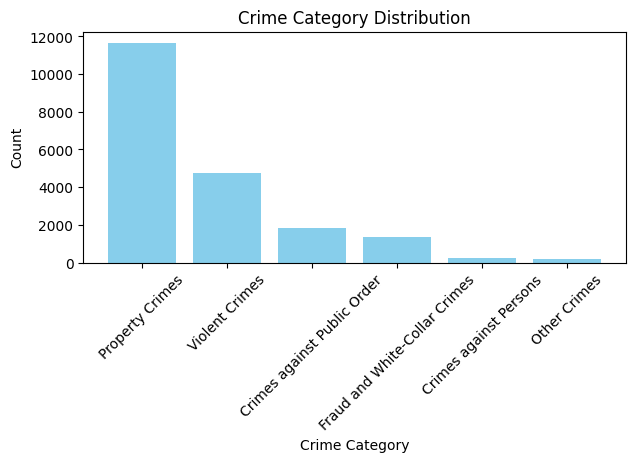

In [58]:
import matplotlib.pyplot as plt

crime_categories = ['Property Crimes', 'Violent Crimes', 'Crimes against Public Order', 'Fraud and White-Collar Crimes', 'Crimes against Persons', 'Other Crimes']
crime_counts = [11666, 4767, 1808, 1355, 225, 179]

plt.figure(figsize=(7, 3))
plt.bar(crime_categories, crime_counts, color='skyblue')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.title('Crime Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [59]:
X.shape, y.shape

((20000, 495), (20000,))

In [60]:
from sklearn.model_selection import train_test_split

**SPLITTING**

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)

In [62]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((15000, 495), (5000, 495), (15000,), (5000,))

In [63]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [64]:
def eval_model(X_train, X_val, y_train, y_val, estimator):
    estimator.fit(X_train, y_train)
    y_train_pred = estimator.predict(X_train)
    y_val_pred = estimator.predict(X_val)
    print(estimator,"'s Performance:")
    print()
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
    print()
    print("Training Recall: ", recall_score(y_train, y_train_pred, average='weighted'))
    print("Validation Recall: ", recall_score(y_val, y_val_pred, average='weighted'))
    print()
    print("Training Precision: ", precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
    print("Validation Precision: ", precision_score(y_val, y_val_pred, average='weighted', zero_division=0))
    print()
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

**BASELINE MODEL**

DummyClassifier(random_state=42) 's Performance:

Training Accuracy:  0.5833333333333334
Validation Accuracy:  0.5832

Training Recall:  0.5833333333333334
Validation Recall:  0.5832

Training Precision:  0.3402777777777778
Validation Precision:  0.34012224



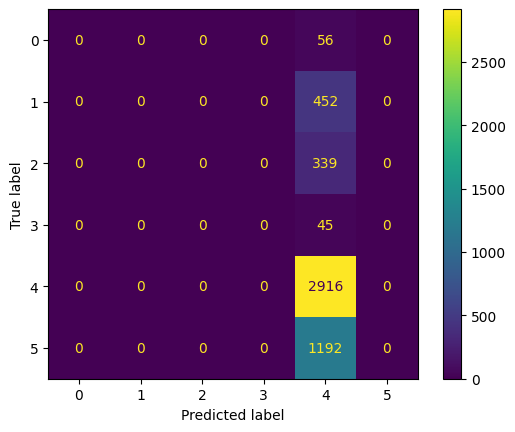

In [65]:
dummy_clf = DummyClassifier(random_state=42)
eval_model(X_train, X_val, y_train, y_val, dummy_clf)

**LOGISTIC REGRESSION**

In [66]:
'''from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=100000, random_state=42)
eval_model(X_train, X_val, y_train, y_val, lr_clf)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
LogisticRegression(max_iter=100000, random_state=42) 's Performance:

Training Accuracy:  0.8655333333333334
Validation Accuracy:  0.8646

Training Recall:  0.8655333333333334
Validation Recall:  0.8646

Training Precision:  0.8468340093141288
Validation Precision:  0.8415426977473839'''

"from sklearn.linear_model import LogisticRegression\nlr_clf = LogisticRegression(max_iter=100000, random_state=42)\neval_model(X_train, X_val, y_train, y_val, lr_clf)\n\n/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):\nSTOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.\n\nIncrease the number of iterations (max_iter) or scale the data as shown in:\n    https://scikit-learn.org/stable/modules/preprocessing.html\nPlease also refer to the documentation for alternative solver options:\n    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression\n  n_iter_i = _check_optimize_result(\nLogisticRegression(max_iter=100000, random_state=42) 's Performance:\n\nTraining Accuracy:  0.8655333333333334\nValidation Accuracy:  0.8646\n\nTraining Recall:  0.8655333333333334\nValidation Recall:  0.8646\n\nTraining Precision:  0.8468340093141288\nValidation Precision:  0.8415426977473839"

In [67]:
'''from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lr_pipe = Pipeline([('scaling', StandardScaler()), ('lr_clf', lr_clf)])
eval_model(X_train, X_val, y_train, y_val, lr_pipe)'''

"from sklearn.linear_model import LogisticRegression\nlr_clf = LogisticRegression(max_iter=1000, random_state=42)\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nlr_pipe = Pipeline([('scaling', StandardScaler()), ('lr_clf', lr_clf)])\neval_model(X_train, X_val, y_train, y_val, lr_pipe)"

**Logistic Regression Cross Validation**

In [68]:
'''from sklearn.model_selection import cross_val_score
lr_cv_acc = cross_val_score(lr_pipe, X, y, cv=10, scoring='accuracy')
lr_cv_recall = cross_val_score(lr_pipe, X, y, cv=10, scoring='recall_weighted')
lr_cv_precision = cross_val_score(lr_pipe, X, y, cv=10, scoring='precision_weighted')

print(f'Logistic Regression Cross Val Scores: {round(lr_cv_acc.mean(), 2)} +/- {round(lr_cv_acc.std(), 2)}')
print(f'Logistic Regression Cross Val Scores: {round(lr_cv_recall.mean(), 2)} +/- {round(lr_cv_recall.std(), 2)}')
print(f'Logistic Regression Cross Val Scores: {round(lr_cv_precision.mean(), 2)} +/- {round(lr_cv_precision.std(), 2)}')'''

"from sklearn.model_selection import cross_val_score\nlr_cv_acc = cross_val_score(lr_pipe, X, y, cv=10, scoring='accuracy')\nlr_cv_recall = cross_val_score(lr_pipe, X, y, cv=10, scoring='recall_weighted')\nlr_cv_precision = cross_val_score(lr_pipe, X, y, cv=10, scoring='precision_weighted')\n\nprint(f'Logistic Regression Cross Val Scores: {round(lr_cv_acc.mean(), 2)} +/- {round(lr_cv_acc.std(), 2)}')\nprint(f'Logistic Regression Cross Val Scores: {round(lr_cv_recall.mean(), 2)} +/- {round(lr_cv_recall.std(), 2)}')\nprint(f'Logistic Regression Cross Val Scores: {round(lr_cv_precision.mean(), 2)} +/- {round(lr_cv_precision.std(), 2)}')"

**Decision Tree**

In [69]:
'''from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_pipe = Pipeline([('scaling', StandardScaler()), ('dt_clf', dt_clf)])
eval_model(X_train, X_val, y_train, y_val, dt_pipe)'''

"from sklearn.tree import DecisionTreeClassifier\ndt_clf = DecisionTreeClassifier(criterion='entropy')\ndt_pipe = Pipeline([('scaling', StandardScaler()), ('dt_clf', dt_clf)])\neval_model(X_train, X_val, y_train, y_val, dt_pipe)"

**Decision Tree Grid Search**

In [70]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

dt_grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)'''

'''best_params = dt_grid_search.best_params_
best_model = dt_grid_search.best_estimator_
print("Best parameters found: ", best_params)
eval_model(X_train, X_val, y_train, y_val, best_model)

Output:
Best parameters found:  {'ccp_alpha': 0.0, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20) 's Performance:

Training Accuracy:  0.97
Validation Accuracy:  0.94

Training Recall:  0.97
Validation Recall:  0.94

Training Precision:  0.97
Validation Precision:  0.94'''

'best_params = dt_grid_search.best_params_\nbest_model = dt_grid_search.best_estimator_\nprint("Best parameters found: ", best_params)\neval_model(X_train, X_val, y_train, y_val, best_model)\n\nOutput:\nBest parameters found:  {\'ccp_alpha\': 0.0, \'max_depth\': 20, \'max_features\': None, \'min_samples_leaf\': 1, \'min_samples_split\': 20}\nDecisionTreeClassifier(criterion=\'entropy\', max_depth=20, min_samples_split=20) \'s Performance:\n\nTraining Accuracy:  0.97\nValidation Accuracy:  0.94\n\nTraining Recall:  0.97\nValidation Recall:  0.94\n\nTraining Precision:  0.97\nValidation Precision:  0.94'

In [71]:
'''dt_clf_gini = DecisionTreeClassifier(max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=20)
eval_model(X_train, X_val, y_train, y_val, dt_clf_gini)'''

'dt_clf_gini = DecisionTreeClassifier(max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=20)\neval_model(X_train, X_val, y_train, y_val, dt_clf_gini)'

In [72]:
'''from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_pipe = Pipeline([('scaling', StandardScaler()), ('knn_clf', knn_clf)])
eval_model(X_train, X_val, y_train, y_val, knn_pipe)'''

"from sklearn.neighbors import KNeighborsClassifier\nknn_clf = KNeighborsClassifier()\nknn_pipe = Pipeline([('scaling', StandardScaler()), ('knn_clf', knn_clf)])\neval_model(X_train, X_val, y_train, y_val, knn_pipe)"

In [73]:
'''param_grid = {
    'n_neighbors': [5, 7, 9,],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [10, 30, 50],
    'metric': ['euclidean', 'minkowski']
}

knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

best_params = knn_grid_search.best_params_
best_model = knn_grid_search.best_estimator_
print("Best parameters found: ", best_params)
eval_model(X_train, X_val, y_train, y_val, best_model)

Output: 
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=9,
                     weights='distance') 's Performance:
Training Accuracy:  1.0
Validation Accuracy:  0.58025
'''

'param_grid = {\n    \'n_neighbors\': [5, 7, 9,],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\'],\n    \'leaf_size\': [10, 30, 50],\n    \'metric\': [\'euclidean\', \'minkowski\']\n}\n\nknn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, scoring=\'accuracy\')\nknn_grid_search.fit(X_train, y_train)\n\nbest_params = knn_grid_search.best_params_\nbest_model = knn_grid_search.best_estimator_\nprint("Best parameters found: ", best_params)\neval_model(X_train, X_val, y_train, y_val, best_model)\n\nOutput: \nBest parameters found:  {\'algorithm\': \'auto\', \'leaf_size\': 10, \'metric\': \'euclidean\', \'n_neighbors\': 9, \'weights\': \'distance\'}\nKNeighborsClassifier(leaf_size=10, metric=\'euclidean\', n_neighbors=9,\n                     weights=\'distance\') \'s Performance:\nTraining Accuracy:  1.0\nValidation Accuracy:  0.58025\n'

In [74]:
'''from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
eval_model(X_train, X_val, y_train, y_val, rf_clf)'''

'from sklearn.ensemble import RandomForestClassifier\nrf_clf = RandomForestClassifier(n_estimators=300, random_state=42)\neval_model(X_train, X_val, y_train, y_val, rf_clf)'

In [75]:
'''param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.2f}")
Output:
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.95'''

'param_grid = {\n    \'max_depth\': [10, 20, 30, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n}\n\ngrid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, n_jobs=-1, verbose=2, scoring=\'accuracy\')\ngrid_search_rf.fit(X_train, y_train)\n\nprint(f"Best parameters found: {grid_search_rf.best_params_}")\nprint(f"Best cross-validation score: {grid_search_rf.best_score_:.2f}")\nOutput:\nFitting 5 folds for each of 36 candidates, totalling 180 fits\nBest parameters found: {\'max_depth\': None, \'min_samples_leaf\': 1, \'min_samples_split\': 5}\nBest cross-validation score: 0.95'

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42) 's Performance:

Training Accuracy:  0.9950666666666667
Validation Accuracy:  0.9518

Training Recall:  0.9950666666666667
Validation Recall:  0.9518

Training Precision:  0.995092767059309
Validation Precision:  0.952553493368948



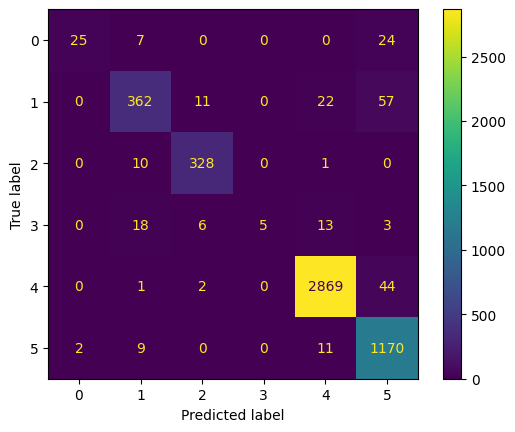

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=1, min_samples_split=5,random_state=42)
eval_model(X_train, X_val, y_train, y_val, rf_clf)

GradientBoostingClassifier(min_samples_split=5, n_estimators=300,
                           random_state=42) 's Performance:

Training Accuracy:  0.9860666666666666
Validation Accuracy:  0.9566

Training Recall:  0.9860666666666666
Validation Recall:  0.9566

Training Precision:  0.9861691888768132
Validation Precision:  0.9550274419843306



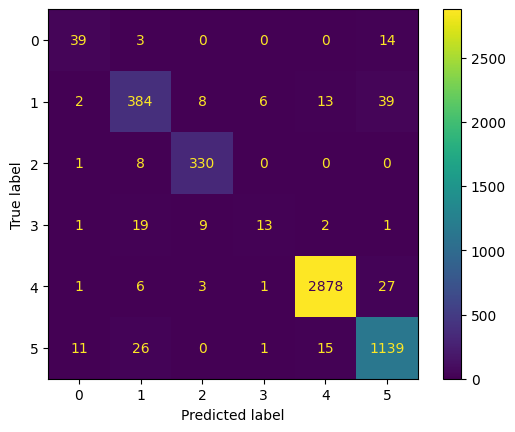

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=300, min_samples_split=5, random_state=42)
eval_model(X_train, X_val, y_train, y_val, gb_clf)

In [78]:
prediction = gb_clf.predict(test_data)

In [79]:
final_prediction = pd.DataFrame({'ID': range(1, len(prediction) + 1), 'Crime_Category': prediction})
final_prediction.to_csv('gb_sixth_submission.csv', index=False)